# Exercise 1: Sorting Lists of Pairs (50 marks)

(Note that in this exercise, questions may be attempted without having completed all previous questions)

Consider the abstract Python class below:

In [1]:
class Comparison:
    def __init__(self):
        pass
    
    #returns True if the two objects are comparable,
    #False otherwise
    def areComparable(self, other):
        raise Exception("NotImplementedException")
        
    #returns True if the two objects are equal,
    #False otherwise
    def __eq__(self, other):
        raise Exception("NotImplementedException")
   
    #returns True if self > other,
    #False otherwise
    def __gt__(self, other):
        raise Exception("NotImplementedException")
        
    #returns True if self < other,
    #False otherwise
    def __lt__(self, other):
        raise Exception("NotImplementedException")    
        
    def __ne__(self, other):
        return not self.__eq__(other)
                
    def __ge__(self, other):
        return self.__eq__(other) or self.__gt__(other)

    def __le__(self, other):
        return self.__eq__(other) or self.__lt__(other)
        
    def compare(self, other):
        if self.areComparable(other) is False:
            return None
        elif self == other:
            return 0
        elif self < other:
            return -1
        elif self > other:
            return 1
        else:
            assert False, "Inconsistent operation definitions"

The Comparison class provides a way to model items that are not always comparable. For instance, the pair of integers $(5, 10)$ is greater than $(4, 8)$, but it is not comparable to $(6, 5)$, because $5 < 6$ and $10 > 5$.

In this exercise, we will look into different ways to sort list of pairs. We will suppose that the pairs in a list are all different.  

## Question 1.1 (10 marks)

The rules of comparison between two Pairs $(a, b)$ and $(c, d)$ are:
* $(a, b) == (c, d)$ if and only if $a == c$ and $b == d$,
* $(a, b) > (c, d)$ if and only if ($a > c$ and $b \geq d$) or ($a \geq c$ and $b > d$),
* $(a, b) < (c, d)$ if and only if ($a < c$ and $b \leq d$) or ($a \leq c$ and $b < d$).

We say that $(a, b)$ and $(c, d)$ are comparable if 
* $(a, b) == (c, d)$, or
* $(a, b) > (c, d)$, or
* $(a, b) < (c, d)$.

We ask that you implement the rules above in the class called Pair below, by completing the functions that have a comment "#TODO" in the body. Note that the class Pair inherits from Comparison.

In [2]:
class Pair(Comparison):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({},{})".format(self.x, self.y)
        
    def areComparable(self, other):
        return (((self.x == other.x) and (self.y == other.y)) or \
                ((self.x > other.x) and (self.y >= other.y)) or \
                ((self.x >= other.x) and (self.y > other.y)) or \
                ((self.x < other.x) and (self.y <= other.y)) or \
                ((self.x <= other.x) and (self.y < other.y)))
        
        
    def __eq__(self, other):
        return (self.x == other.x and self.y == other.y)
    
    
    def __gt__(self, other):
        return ((self.x > other.x and self.y >= other.y) or  \
                (self.x >= other.x and self.y > other.y))
        
    def __lt__(self, other):
        return ((self.x < other.x and self.y <= other.y) or \
                (self.x <= other.x and self.y < other.y))

We provide a test class below. You don't need to edit it, but the class Pair you write need pass these tests! 

In [3]:
import unittest,copy

class TestPair(unittest.TestCase):
    def setUp(self):
        self.v00 = Pair(0,0)
        self.v01 = Pair(0,1)
        self.v10 = Pair(1, 0)
        self.v11 = Pair(1, 1)
        self.v21 = Pair(2, 1)
        self.v31 = Pair(3, 1)
        self.v23 = Pair(2, 3)
        self.v23other = Pair(2, 3)
        
    def test_areComparable(self):
        self.assertTrue(self.v00.areComparable(self.v01))
        self.assertTrue(self.v01.areComparable(self.v00))
        
        self.assertTrue(self.v11.areComparable(self.v00))
        self.assertTrue(self.v00.areComparable(self.v11))
        
        self.assertTrue(self.v21.areComparable(self.v23))
        self.assertTrue(self.v23.areComparable(self.v21))
        
        self.assertTrue(self.v23.areComparable(self.v23))
        
        self.assertTrue(self.v23.areComparable(self.v23other))
        self.assertTrue(self.v23other.areComparable(self.v23))
        
        self.assertFalse(self.v01.areComparable(self.v10))
        self.assertFalse(self.v10.areComparable(self.v01))
        
        self.assertFalse(self.v31.areComparable(self.v23))
        self.assertFalse(self.v23.areComparable(self.v31))
        
    def test_eq(self):
        self.assertTrue(self.v00 == self.v00)
        self.assertTrue(self.v21 == self.v21)
        self.assertTrue(self.v23 == self.v23)
        self.assertTrue(self.v23 == self.v23other)
        
        self.assertFalse(self.v00 == self.v11)
        self.assertFalse(self.v21 == self.v11)
        self.assertFalse(self.v21 == self.v23)
        
    def test_ne(self):
        self.assertFalse(self.v00 != self.v00)
        self.assertFalse(self.v21 != self.v21)
        self.assertFalse(self.v23 != self.v23)
        self.assertFalse(self.v23 != self.v23other)
        
        self.assertTrue(self.v00 != self.v11)
        self.assertTrue(self.v21 != self.v11)
        self.assertTrue(self.v21 != self.v23)
        
    def test_gt(self):
        self.assertTrue(self.v01 > self.v00)
        self.assertTrue(self.v10 > self.v00)
        self.assertTrue(self.v31 > self.v21)
        
        self.assertFalse(self.v00 > self.v01)
        self.assertFalse(self.v00 > self.v01)
        self.assertFalse(self.v21 > self.v31)
        
        self.assertFalse(self.v10 > self.v01)
        self.assertFalse(self.v01 > self.v10)
        self.assertFalse(self.v31 > self.v23)
        self.assertFalse(self.v23 > self.v31)
        
    def test_lt(self):
        self.assertFalse(self.v01 < self.v00)
        self.assertFalse(self.v10 < self.v00)
        self.assertFalse(self.v31 < self.v21)
        
        self.assertTrue(self.v00 < self.v01)
        self.assertTrue(self.v00 < self.v01)
        self.assertTrue(self.v21 < self.v31)
        
        self.assertFalse(self.v10 < self.v01)
        self.assertFalse(self.v01 < self.v10)
        self.assertFalse(self.v31 < self.v23)
        self.assertFalse(self.v23 < self.v31)

In [4]:
test = TestPair()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.010s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In the following questions, we suppose that we have a set of Pairs, and that not every two pairs in that set are comparable.

## Question 1.2 (10 marks)

Given a list $l$ of Pairs in no particular order, use a sorting algorithm similar to *selection sort* to sort $l$ such that, at the end of the algorithm, for every two pairs $l[i]=(a, b)$ and $l[j]=(c, d)$ at index $i$ and $j$ in $l$, respectively, with $i <j$, we have:
* either $(a, b) \leq (c, d)$,
* or $(a, b)$ and $(c, d)$ are not comparable.

In [5]:
def pairSort(l):
    for i in range(len(l)):
        min_idx = i
        for j in range(i+1, len(l)):
            if l[min_idx] > l[j]:
                min_idx = j
             
    # Swap the found minimum element with 
    # the first element        
        l[i], l[min_idx] = l[min_idx], l[i]

Again, we provide a test class below. You don't need to edit it, but the method pairsort you wrote needs to pass these tests! 

In [6]:
import unittest
import random

class TestPairSort(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSort
    
    def test1(self):
        #in this test we suppose x=0 for all entries
        #this means that the algorithm should do a regular bubble sort
        #we also suppose everything is already ordered
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
            
    def test2(self):
        #in this test we suppose x=0 for all entries
        #this means that the sort algorithms should do a "regular" sort
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        self.sortAlgo(l)
        #for item in sortedl: print(item)
        self.checkorder(l)

            
    def test3(self):
        #in this test we suppose x and y are not fixed
        #we also suppose that everything is in a good order
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        sortedl = self.sortAlgo(l)
        #for item in sortedl: print(item)
        self.checkorder(l)
        
    def test4(self):
        #in this test we suppose x and y are not fixed
        #we suppose there is no two pairs that are comparable
        l = [self.PairClass(8, 8), self.PairClass(5, 10), self.PairClass(10, 8), self.PairClass(12, 5)]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
        
    def test5(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we only test one case
        l = [self.PairClass(5, 8), self.PairClass(10, 10), self.PairClass(12, 5), self.PairClass(9, 5),
             self.PairClass(5, 10), self.PairClass(7, 2), self.PairClass(6, 10) ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
    
    def test6(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we generate many cases
        for size in range(0, 100):
            #create a list
            l = []
            xs = random.sample(range(0, 100), size)
            xy = random.sample(range(0, 100), size)
            for i in range(0, size):
                l.append(self.PairClass(xs[i], xy[i]))
            self.sortAlgo(l)
            #for item in l: print(item)
            self.checkorder(l)
        
    def checkorder(self, l):
        for i in range(0, len(l)-1):
            for j in range(i, len(l)-1):
                if l[i].areComparable(l[j]):
                    self.assertTrue(l[i] <= l[j], "{} and {} are not well ordered".format(l[i], l[j]) )

In [7]:
test = TestPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 1.399s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.3 (5 marks)

Suppose we have a list of Pairs of integers.
We want to implement a comparison mechanism between two pairs of integers using a function **pairKey**, which takes a pair as input and outputs a single number. The function pairKey should be such that for two pairs $(a, b)$ and $(c, d)$,
* $(a,b) > (c,d)$ implies $pairKey((a,b)) > pairKey((c,d))$,
* $(a,b) < (c,d)$ implies $pairKey((a,b)) < pairKey((c,d))$,
* $(a,b) == (c,d)$ implies $pairKey((a,b)) == pairKey((c,d))$.

In [8]:
def pairKey(self):
    return (((self.x + self.y) * (self.x + self.y + 1))/ 2) + self.y

If you have defined the function pairKey correctly, we should now be able to use the built-in sort function of Python to sort our Pairs:

In [9]:
def pairSortWithKey(l):
    return l.sort(key = pairKey)

(For more information on what the above does, please refer to https://docs.python.org/3/howto/sorting.html)

In [10]:
class TestKeyPairSort(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortWithKey

In [11]:
test = TestKeyPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 1.202s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.4 (5 marks)

Prove that the pairKey function you have defined above provides a guarantee that, if used as key for Python's sort, then the list will be sorted as stated in Queston 1.2.

#### Function used above is called cantor pairing function which encodes pair of numbers to single number.(https://en.wikipedia.org/wiki/Pairing_function)

Pairing function has quality that each time returns unique number which if pair (a,b) is greater than pair (c,d) then it'll return greater value for pair (a,b).

1) a < b : When a is less than b then pairKey function returns less value for a with respect to b

* Pairs: (5,10)    (6,12)
* pairKey:  130          183

* Pairs: (5,10)    (5,12)
* pairKey:  130	      165

2) a > b : When a is greater than b then pairKey function returns big value for a with respect to b

* Pairs: (12,6)    (12,5)    
* pairKey:  158          177

3) a == b : When a is is equal to b then pairKey function returns same value for a and b.

* Pairs: (5,10)    (5,10)
* pairKey:  130          130

4) a not comparable to b : When a and b are not comparable then also pairKey returns defferent values but it does not affect our sorting because they are not comparable and their order does not matter neither they will impact other list members.

* Pairs: (5, 10)   (10,5)
* pairKey:  130          125


## Question 1.5 (5 marks)

(We have *not* covered the concept of stability in this unit. If you are not yet familiar with this concept, learning about it is part of the question.)

Use the fact that Python's sort is stable to provide a simple solution to sort a list of pairs as stated in Question 1.2. Use unit testing as in the previous questions to test your solution. Both your solution and the unit testing will be assessed. (no need to rewrite *new* test cases; use the old ones).

In [12]:
def pairSortUsingStability(l):
    for i in range(1, len(l)):
        key = l[i]
        j = i-1
        while j >=0 and (key <= l[j] or not key.areComparable(l[j])):
                l[j+1] = l[j]
                j -= 1
        l[j+1] = key 

In [13]:
class TestPairSortUsingStability(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortUsingStability

In [14]:
test = TestPairSortUsingStability()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 1.507s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.6 (10 marks)

Define a function pairSortFast that takes a list $l$ of $n$ Pairs as input and sort this list in $O(n)$ time in the worst case (not the amortised worst case). Suppose that any pair $(a,b)$ in $l$ is such that $a$ and $b \in \{0, \dots, U\}$, where $U$ is a small integer. Hint: *a clever hashing function* may help.

In [15]:
## We are using pairKey function designed above as hashing function to sort elements of Array.

#l = [Pair(5, 8), Pair(5, 10), Pair(6, 10), Pair(7, 12), 
#            Pair(5, 12), Pair(9, 12), ]
def hashFunc(p):
    return (((p.x + p.y) * (p.x + p.y + 1))/ 2) + p.y

def pairSortFast(l):
    sorted_arr = []
    if l:
        vals = [hashFunc(p) for p in l]
        max_val = max(vals)
        #print(vals,max_val)
        hash_arr = [0] * (int(max_val)+1)
        for p in l:
            hash_arr[int(hashFunc(p))] = p
        for i in hash_arr:
            if i:
                sorted_arr.append(i)
    return sorted_arr
#sorted_arr = hashedSorting(l)
#print([(p.x,p.y) for p in sorted_arr])

In [16]:
class TestPairSortFast(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortFast
    
    def test1(self):
        #in this test we suppose x=0 for all entries
        #this means that the algorithm should do a regular bubble sort
        #we also suppose everything is already ordered
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        sorted_l = self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(sorted_l)
            
    def test2(self):
        #in this test we suppose x=0 for all entries
        #this means that the sort algorithms should do a "regular" sort
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        sorted_l = self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(sorted_l)

            
    def test3(self):
        #in this test we suppose x and y are not fixed
        #we also suppose that everything is in a good order
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        sorted_l = self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(sorted_l)
        
    def test4(self):
        #in this test we suppose x and y are not fixed
        #we suppose there is no two pairs that are comparable
        l = [self.PairClass(8, 8), self.PairClass(5, 10), self.PairClass(10, 8), self.PairClass(12, 5)]
        sorted_l = self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(sorted_l)
        
    def test5(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we only test one case
        l = [self.PairClass(5, 8), self.PairClass(10, 10), self.PairClass(12, 5), self.PairClass(9, 5),
             self.PairClass(5, 10), self.PairClass(7, 2), self.PairClass(6, 10) ]
        sorted_l = self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(sorted_l)
    
    def test6(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we generate many cases
        for size in range(0, 100):
            #create a list
            l = []
            xs = random.sample(range(0, 100), size)
            xy = random.sample(range(0, 100), size)
            for i in range(0, size):
                l.append(self.PairClass(xs[i], xy[i]))
            sorted_l = self.sortAlgo(l)
            #for item in l: print(item)
            self.checkorder(sorted_l)
        
    def checkorder(self, l):
        for i in range(0, len(l)-1):
            for j in range(i, len(l)-1):
                if l[i].areComparable(l[j]):
                    self.assertTrue(l[i] <= l[j], "{} and {} are not well ordered".format(l[i], l[j]) )

In [17]:
test = TestPairSortFast()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 1.301s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.7 (5 marks)

Thoroughly benchmark all the sorting algorithms you have written, and plot their running time as a function of the size of the input list. You may use methods and code seen in the lectures or tutes and pracs during the semester.

In [18]:
import matplotlib.pyplot as plt
import time
## Plotting benchmark for various sorting algorithms
benchmark_examples_cnt = [10,50,100,500,750,1000,1500,2000,2500,3000]#,10000] #,100000] #,1000000]

def benchMarkPerformance(sorting_algo):
    benchmark_times = []
    for size in benchmark_examples_cnt:
        #print(size)
        l=[]
        xs = random.sample(range(0, size), size)
        xy = random.sample(range(0, size), size)
        #print(xs,xy)
        for i in range(0, size):
            l.append(Pair(xs[i], xy[i]))
        start = time.time()
        sorting_algo(l)
        benchmark_times.append(time.time() - start)
    return benchmark_times
    
        
selection_sort = benchMarkPerformance(pairSort)
python_sort_with_key = benchMarkPerformance(pairSortWithKey)
insertion_sort = benchMarkPerformance(pairSortUsingStability)
sort_using_hash = benchMarkPerformance(pairSortFast)
#print(arr1,arr2,arr3,arr4)

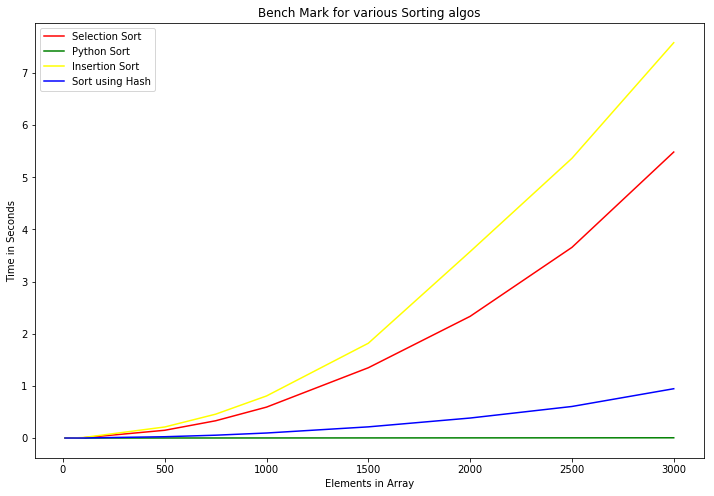

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(benchmark_examples_cnt,selection_sort,c='red',label='Selection Sort')
plt.plot(benchmark_examples_cnt,python_sort_with_key,c='green',label = 'Python Sort')
plt.plot(benchmark_examples_cnt,insertion_sort,c='yellow',label='Insertion Sort')
plt.plot(benchmark_examples_cnt,sort_using_hash,c='blue',label='Sort using Hash')
plt.title('Bench Mark for various Sorting algos')
plt.xlabel('Elements in Array')
plt.ylabel('Time in Seconds')
plt.legend(loc='best')

# Exercise 2 (25 marks)

We are again interested in lists of pairs of integers. However, this time, we want to store these pairs into a rooted tree $T$. More precisely, each node of $T$ will store a pair of $l$. This tree $T$ will have the property that for each inner node $k$ that stores a pair $(a, b)$, the pair $(c, d)$ stored at a node in the subtree of $k$ satisfies $(a, b) \leq (c, d)$. Furthermore, the pairs stored at sibling nodes must be non-comparable.

We will suppose that the root of the tree is a dummy pair $(-1, -1)$.

You need to provide a unit test for each question in this exercise where code is required. Each question is evaluated on the correctness of your code and the thoroughness of your unit tests.

## Question 2.1 (10 marks)

Define a class that stores the tree $T$ for any given list of pairs. The \_\_init\_\_() function must take a list as input and build the tree accordingly. An insert() function must allow the insertion of a pair to an initialised tree. In $O()$, what is the running time complexity of the functions you defined?

In [20]:
class TreeNodeG(object):
    def __init__(self,parent, children, pair):
        self.parent = parent
        self.children = children
        self.pair = pair
        
class GeneralTree(object):
    def __init__(self,l):
        self.root = TreeNodeG(None,[],Pair(-1,-1))
        for node in l:
            self.insert(self.root,node)
            
    def insert(self, start, node):
        comparable = False
        for i,child in enumerate(start.children):
            if child.pair.areComparable(node):
                comparable = True
                if node > child.pair:
                    self.insert(child,node)
                else:
                    less_childs = [(i,child) for i,child in enumerate(start.children) if child.pair >= node]
                    idxs, less_childs = list(zip(*less_childs))
                    less_childs = [copy.deepcopy(child) for child in less_childs]
                    new_node = TreeNodeG(start, less_childs, node)
                    for chld in less_childs:
                        chld.parent = new_node
                    start.children[idxs[0]] = copy.deepcopy(new_node)
                    for idx in idxs[1:]:
                        start.children.pop(idx)
                break
                    
        if not comparable:
            start.children.append(TreeNodeG(start,[],node))
    
    def treeTraversal(self,start,level):
        print('Node : ' + str((start.pair.x,start.pair.y)) + ' , ' + 'Level : %s' % level)
        for child in start.children:
            if child.children:
                self.treeTraversal(child,level+1)
            else:
                print('Node : ' + str((child.pair.x,child.pair.y)) + ' , ' + 'Level : %s' % str(level+1))

In [21]:
print('Tree 1')
l = [Pair(5, 10), Pair(5, 8), Pair(9, 12), Pair(6, 10), Pair(7, 12), Pair(5, 12),]

t = GeneralTree(l)
t.treeTraversal(t.root,0)

Tree 1
Node : (-1, -1) , Level : 0
Node : (5, 8) , Level : 1
Node : (5, 10) , Level : 2
Node : (6, 10) , Level : 3
Node : (7, 12) , Level : 4
Node : (9, 12) , Level : 5
Node : (5, 12) , Level : 3


In [22]:
import unittest
import random

class TestPairTree(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSort
    
    def test1(self):
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        t =GeneralTree(l)
        #print('Tree 1')
        #t.treeTraversal(t.root,0)
        #print()

    def test2(self):
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        t =GeneralTree(l)
        self.checkTreeValidity(t)
        #print('Tree 2')
        #t.treeTraversal(t.root,0)
        #print()
 
    def test3(self):
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        t =GeneralTree(l)
        self.checkTreeValidity(t)
        #print('Tree 3')
        #t.treeTraversal(t.root,0)
        #print()
    
    def test3_2(self):
        l = [self.PairClass(5, 10), self.PairClass(7,12), self.PairClass(9,12), self.PairClass(5, 8), 
            self.PairClass(5, 12), self.PairClass(6,10), ]
        t =GeneralTree(l)
        self.checkTreeValidity(t)
        #print('Tree 3_2')
        #t.treeTraversal(t.root,0)
        #print()
   
    def test4(self):
        l = [self.PairClass(8, 8), self.PairClass(5, 10), self.PairClass(10, 8), self.PairClass(12, 5)]
        t =GeneralTree(l)
        self.checkTreeValidity(t)
        #print('Tree 4')
        #t.treeTraversal(t.root,0)
        #print()
       
    def test5(self):
        l = [self.PairClass(5, 8), self.PairClass(10, 10), self.PairClass(12, 5), self.PairClass(9, 5),
             self.PairClass(5, 10), self.PairClass(7, 2), self.PairClass(6, 10) ]
        t =GeneralTree(l)
        self.checkTreeValidity(t)
        #print('Tree 5')
        #t.treeTraversal(t.root,0)
        #print()
        
    def checkTreeValidity(self,t):
        q = [t.root]
        while q:
            node = q.pop()
            for i,node1 in enumerate(node.children):
                for node2 in node.children[i+1:]:
                    self.assertTrue(node1.pair != node2.pair and not node1.pair.areComparable(node2.pair),'Two sibling nodes are comparable %s, %s' % (str((node1.pair.x,node1.pair.y)),str((node2.pair.x,node2.pair.y))))
            q.extend(node.children)
            q2 = node.children
            while q2:
                child = q2.pop()
                self.assertTrue(child.pair > node.pair,'Child has less value than parent. Child %s, Parent %s' % (str((child.pair.x,child.pair.y)),str((node.pair.x,node.pair.y))))
                q2.extend(child.children)

In [23]:
test = TestPairTree()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.037s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 2.2 (5 marks)

In the class you have defined in Question 2.1, can there be multiple trees that store the same list of pairs? (including after insertions?). Prove your answer.

### There can be only 1 tree even if there are elements provided in different sequence.

### Checkout above proof below

In [24]:
print('Tree 1')
l = [Pair(5, 10), Pair(5, 8), Pair(9, 12), Pair(6, 10), Pair(7, 12), Pair(5, 12),]

t = GeneralTree(l)
t.treeTraversal(t.root,0)
print()
print('Tree 2')
## This list is same as above list. We ahve just changed order of elements to check tree behaviour.
l = [Pair(6, 10), Pair(7, 12), Pair(5, 10), Pair(5, 12), Pair(5, 8), Pair(9, 12),]

t = GeneralTree(l)
t.treeTraversal(t.root,0)

Tree 1
Node : (-1, -1) , Level : 0
Node : (5, 8) , Level : 1
Node : (5, 10) , Level : 2
Node : (6, 10) , Level : 3
Node : (7, 12) , Level : 4
Node : (9, 12) , Level : 5
Node : (5, 12) , Level : 3

Tree 2
Node : (-1, -1) , Level : 0
Node : (5, 8) , Level : 1
Node : (5, 10) , Level : 2
Node : (6, 10) , Level : 3
Node : (7, 12) , Level : 4
Node : (9, 12) , Level : 5
Node : (5, 12) , Level : 3


## Question 2.3 (5 marks)

We now relax the constraint that $T$ must be "exactly" a tree. A child node which stores a pair $(c, d)$ must now have as a parent all the nodes that have a pair $(a, b)$ such that $(a,b)\leq(c,d)$.

Design a class (it may be based on the previous one) to allow and build this representation.

In [25]:
import copy

In [26]:
class TreeNode(object):
    def __init__(self,parents, children, pair, level):
        self.parents = parents
        self.children = children
        self.pair = pair
        self.level = level
        
class GeneralTreeRelaxed(object):
    def __init__(self,l):
        self.root = TreeNode([],[],Pair(-1,-1),0)
        for node in l:
            self.insert(self.root,node)

    def increaseLevel(self,start):
        start.level += 1
        for child in start.children:
            if child.children:
                self.increaseLevel(child)
            else:
                child.level += 1
    
    def inserParentInWholeSubTree(self, nodes, parent):
        q = copy.deepcopy(nodes)
        while q:
            node = q.pop()
            node.parents.insert(-1,parent)
            for child in node.children:
                child.parents.insert(-1,parent)
                q.extend(child.children)
    
    def insert(self, start, pair):
        comparable = False
        for i,child in enumerate(start.children):
            if child.pair.areComparable(pair):
                comparable = True
                if pair > child.pair:
                    self.insert(child,pair)
                else:
                    less_childs = [(i,child) for i,child in enumerate(start.children) if child.pair >= pair]
                    idxs, less_childs = list(zip(*less_childs))
                    less_childs = [copy.deepcopy(child) for child in less_childs]
                    for chld in less_childs:
                        self.increaseLevel(chld)
                    #print('Node : %d,%d  -  1 Parents : %s' % (pair.x,pair.y,str(self.listParents(child.parents))))
                    new_node = TreeNode(copy.deepcopy([start]+start.parents),copy.deepcopy(less_childs),pair,child.level)
                    self.inserParentInWholeSubTree(less_childs, copy.deepcopy(new_node))
                    start.children[idxs[0]] = copy.deepcopy(new_node)
                    start.children = copy.copy([child for j,child in enumerate(start.children) if j not in idxs[1:]])
                    #print('Node : %d,%d  -  2 Parents : %s' % (temp.pair.x,temp.pair.y,str(self.listParents(temp.parents))))
                break
                    
        if not comparable:
            #print('Node : %d,%d  -  3 Parents : %s' % (pair.x,pair.y,str(self.listParents(start.parents))))
            start.children.append(TreeNode(copy.deepcopy([start]+start.parents),[],pair,start.level + 1))
    
    def listParents(self,parents):
        return [(parent.pair.x,parent.pair.y) for parent in parents]
    
    def treeTraversal(self,start):
        print('Node : ' + str((start.pair.x,start.pair.y)) + ' , ' + 'Level : %s' % start.level + ', Parents : %s'  % str(self.listParents(start.parents)) + ', Children : %s' % self.listParents(start.children))
        for child in start.children:
            if child.children:
                self.treeTraversal(child)
            else:
                print('Node : ' + str((child.pair.x,child.pair.y)) + ' , ' + 'Level : %s' % str(child.level) + ', Parents : %s' % str(self.listParents(child.parents)) + ', Children : %s' % self.listParents(child.children))

In [27]:
#l = [Pair(92, 32), Pair(48, 31), Pair(5, 10), Pair(60, 26), Pair(2, 68), Pair(1, 37), Pair(50, 7)]
l = [Pair(61, 4), Pair(76, 68), Pair(20, 36), Pair(2, 87), Pair(16, 55), Pair(10, 21), Pair(5, 15), 
     Pair(75, 58), Pair(69, 57), Pair(83, 98), Pair(86, 50), Pair(99, 40)]

t =GeneralTreeRelaxed(l)
#t.treeTraversal(t.root)

t =GeneralTree(l)
#t.treeTraversal(t.root,0)

In [28]:
import unittest
import random

class TestPairTree2(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
    
    def test1(self):
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        t =GeneralTreeRelaxed(l)
        #print('Tree 1')
        #t.treeTraversal(t.root)
        #print()

    def test2(self):
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        t =GeneralTreeRelaxed(l)
        #print('Tree 2')
        #t.treeTraversal(t.root)
        #print()
 
    def test3(self):
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        t =GeneralTreeRelaxed(l)
        #print('Tree 3')
        #t.treeTraversal(t.root,)
        #print()
   
    def test4(self):
        l = [self.PairClass(8, 8), self.PairClass(5, 10), self.PairClass(10, 8), self.PairClass(12, 5)]
        t =GeneralTreeRelaxed(l)
        #print('Tree 4')
        #t.treeTraversal(t.root)
        #print()
       
    def test5(self):
        l = [self.PairClass(5, 8), self.PairClass(10, 10), self.PairClass(12, 5), self.PairClass(9, 5),
             self.PairClass(5, 10), self.PairClass(7, 2), self.PairClass(6, 10) ]
        t =GeneralTreeRelaxed(l)
        #print('Tree 5')
        #t.treeTraversal(t.root)
        #print()
    
    def checkTreeValidity(self,t):
        q = [t.root]
        while q:
            node = q.pop()
            self.checkAllParentsAreLess(node)
            for i,node1 in enumerate(node.children):
                for node2 in node.children[i+1:]:
                    self.assertTrue(node1.pair != node2.pair and not node1.pair.areComparable(node2.pair),'Two sibling nodes are comparable %s, %s' % (str((node1.pair.x,node1.pair.y)),str((node2.pair.x,node2.pair.y))))
            q.extend(node.children)
            q2 = node.children
            while q2:
                child = q2.pop()
                self.assertTrue(child.pair > node.pair,'Child has less value than parent. Child %s, Parent %s' % (str((child.pair.x,child.pair.y)),str((node.pair.x,node.pair.y))))
                q2.extend(child.children)
    
    def checkAllParentsAreLess(self,node):
        for parent in node.parents:
            self.assertTrue(parent.pair <= node.pair,'Parent has more value than Child. Parent : %s, Child : %s' % (str((parent.pair.x, parent.pair.y)),str((node.pair.x,node.pair.y))))

In [29]:
test = TestPairTree2()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.083s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

## Question 2.4 (5 marks)

Using the class written in Question 2.3, design and code an algorithm that traverses all the nodes in that data structure and outputs the stored pairs in sorted order (as defined in Question 1.2).

In [30]:
l = [Pair(5, 8), Pair(5, 10), Pair(6, 10), Pair(7, 12), Pair(5, 12), Pair(9, 12), ]
#l = [Pair(92, 32), Pair(48, 31), Pair(5, 10), Pair(60, 26), Pair(2, 68), Pair(1, 37), Pair(50, 7)]
#l = [Pair(61, 4), Pair(76, 68), Pair(20, 36), Pair(2, 87), Pair(16, 55), Pair(10, 21), Pair(5, 15), 
#     Pair(75, 58), Pair(69, 57), Pair(83, 98), Pair(86, 50), Pair(99, 40)]

#l = [Pair(63, 48),Pair(98, 94),Pair(57, 90),Pair(71, 68), Pair(40, 86), Pair(7, 40),Pair(41, 46),Pair(29, 51),
# Pair(52, 71),Pair(44, 55),Pair(24, 20)]
t =GeneralTreeRelaxed(l)
#t.treeTraversal(t.root)
def treeSort(root):
    sorted_l = []
    q = [root]
    while q:
        #print([(p.pair.x,p.pair.y) for p in q])
        node = q.pop(0)
        #print((node.pair.x,node.pair.y))
        sorted_l.append(copy.deepcopy(node.pair))
        q.extend(copy.deepcopy(node.children))
    return sorted_l

sorted_l = treeSort(t.root)

In [31]:
print([(val.x,val.y)for val in sorted_l if val])

[(-1, -1), (5, 8), (5, 10), (6, 10), (5, 12), (7, 12), (9, 12)]


In [32]:
import unittest
import random

class TestPairTreeSort(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = treeSort
    
    def test1(self):
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        t =GeneralTreeRelaxed(l)
        sorted_l = self.sortAlgo(t.root)
        #print([(p.x,p.y) for p in sorted_l if p.x != -1])
        self.checkorder(sorted_l[1:])
            
    def test2(self):
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        t =GeneralTreeRelaxed(l)
        sorted_l = self.sortAlgo(t.root)
        #print([(p.x,p.y) for p in sorted_l if p.x != -1])
        self.checkorder(sorted_l[1:])

            
    def test3(self):
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        t =GeneralTreeRelaxed(l)
        sorted_l = self.sortAlgo(t.root)
        #print([(p.x,p.y) for p in sorted_l if p.x != -1])
        self.checkorder(sorted_l[1:])
        
    def test4(self):
        l = [self.PairClass(8, 8), self.PairClass(5, 10), self.PairClass(10, 8), self.PairClass(12, 5)]
        sorted_l = []
        t =GeneralTreeRelaxed(l)
        sorted_l = self.sortAlgo(t.root)
        #print([(p.x,p.y) for p in sorted_l if p.x != -1])
        self.checkorder(sorted_l[1:])
        
    def test5(self):
        l = [self.PairClass(5, 8), self.PairClass(10, 10), self.PairClass(12, 5), self.PairClass(9, 5),
             self.PairClass(5, 10), self.PairClass(7, 2), self.PairClass(6, 10) ]
        t =GeneralTreeRelaxed(l)
        sorted_l = self.sortAlgo(t.root)
        #print([(p.x,p.y) for p in sorted_l if p.x != -1])
        self.checkorder(sorted_l[1:])
    
    def checkorder(self, l):
        for i in range(0, len(l)-1):
            for j in range(i, len(l)-1):
                if l[i] and l[j] and l[i].areComparable(l[j]):
                    self.assertTrue(l[i] <= l[j], "{} and {} are not well ordered".format(l[i], l[j]) )

In [33]:
test = TestPairTreeSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.141s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

# Exercise 3 (25 marks)

You are given a tree $T$ with an integer value (negative or positive) at each node. We want to select a subtree of $T$ (with the same root) that maximises the sum of the values at its nodes. Note that the answer is trivially $T$ if all nodes have a non-negative value.

## Question 3.1 (5 marks)

Define a data structure to store $T$.

In [34]:
class TreeNodeInt(object):
    def __init__(self,num, parent, children, value,total_sum = 0, level=0):
        self.num = num
        self.parent = parent
        self.children = children
        self.value = value
        self.subtree_sum = total_sum
        self.level = level
        
class TreeInt(object):

    def __init__(self, tree, values, root = None):
        if root:
            self.root = root
            return
        self.root = TreeNodeInt(0,None,[],values[0],values[0],0)
        #print(self.root.children)
        q = list(zip([0]*len(tree[0]),tree[0]))
        while q:
            parent_node_num, node_num = q.pop()
            self.insert(self.root,parent_node_num,node_num,values[node_num])
            if node_num in tree.keys():
                q.extend(list(zip([node_num] * len(tree[node_num]) ,tree[node_num])))
    
    def insert(self,start, parent_node_num, node_num,value):
        q = [start] + start.children
        node = None
        while q:
            child = q.pop()
            if child.num == parent_node_num:
                node = child
                break
            q.extend(child.children)
        node.children.append(TreeNodeInt(node_num, node, [], value, value,node.level+1))
        while node:
            node.subtree_sum += value
            node = node.parent
    
    @classmethod
    def fromAnotherNode(cls,root):
        t = cls(None,None,root)
        t.root = root
        return t
    
    def traverseTree(self):
        q = [self.root]
        while q:
            node = q.pop()
            print('Node Num : %s, Value : %s, Level : %s, SubTree Sum : %s' % (node.num,node.value,node.level,node.subtree_sum))
            q.extend(node.children)


In [35]:
#t = TreeInt(tree={0:[1,2,3], 1:[4], 2:[5], 3:[6]}, values=[-10,-1,-1,-1,-1,-1,-1])
t = TreeInt(tree={0:[1,2], 1:[3], 2:[4,5]}, values=[-5,6,7,-8,-1,-1,1])
t.traverseTree()

Node Num : 0, Value : -5, Level : 0, SubTree Sum : -2
Node Num : 1, Value : 6, Level : 1, SubTree Sum : -2
Node Num : 3, Value : -8, Level : 2, SubTree Sum : -8
Node Num : 2, Value : 7, Level : 1, SubTree Sum : 5
Node Num : 4, Value : -1, Level : 2, SubTree Sum : -1
Node Num : 5, Value : -1, Level : 2, SubTree Sum : -1


In [36]:
# sum([4,7,2,8,-1,-2,6,-5,-3])
#del max_t

## Question 3.2 (15 marks)

Design and code a dynamic programming algorithm that solves this problem.

In [37]:
def maxSumSubTree(t):
    max_t,big_node = t.root.subtree_sum, t.root
    q = t.root.children
    #print(max_t)
    while q:
        node = q.pop()
        if node.subtree_sum > max_t:
            max_t = node.subtree_sum
            big_node = node
        q.extend(node.children)
    return big_node
big_node = maxSumSubTree(t)

max_subtree = TreeInt.fromAnotherNode(big_node)

print('Maximum subtree sum : %d' % big_node.subtree_sum)
print('Maximum subtree root value : %d' % big_node.value)
print('Maximum subtree root number : %d' % big_node.num)
print()
# max_subtree.traverseTree()

Maximum subtree sum : 5
Maximum subtree root value : 7
Maximum subtree root number : 2



In [38]:
max_subtree = TreeInt.fromAnotherNode(big_node)
max_subtree.traverseTree()

Node Num : 2, Value : 7, Level : 1, SubTree Sum : 5
Node Num : 4, Value : -1, Level : 2, SubTree Sum : -1
Node Num : 5, Value : -1, Level : 2, SubTree Sum : -1


## Question 3.3 (5 marks)

 Write and run unit tests and performance tests.

In [39]:
import unittest
import random

class TestTreeNodeInt(unittest.TestCase):
    def setUp(self):
        self.subTreeAlgo = maxSumSubTree
    
    def test1(self):
        t = TreeInt(tree={0:[1,2,3], 1:[4], 2:[5], 3:[6]}, values=[1,-1,-200,-100,-1,100,1000])
        #t.traverseTree()
        max_node = self.subTreeAlgo(t)
        self.assertEqual(max_node.subtree_sum,1000,'Maximum subtree sum should be 1000')
        self.assertEqual(max_node.num,6,'Maximum subtree root node should be 6')
        
            
    def test2(self):
        t = TreeInt(tree={0:[1,2], 1:[3], 2:[4,5]}, values=[10,1,-1,-1,-1,1,1])
        #t.traverseTree()
        max_node = self.subTreeAlgo(t)
        self.assertEqual(max_node.subtree_sum,9,'Maximum subtree sum should be 9')
        self.assertEqual(max_node.num,0,'Maximum subtree root node should be 0')
            
    def test3(self):
        t = TreeInt(tree={0:[1,2,4,5], 1:[3,6,7], 2:[8,9], 3:[10,11], 9:[12,13]}, values=[10,1,-1,-1,-1,1,1,12,5,7,3,-2,-8,-10])
        #t.traverseTree()
        max_node = self.subTreeAlgo(t)
        self.assertEqual(max_node.subtree_sum,17,'Maximum subtree sum should be 17')
        self.assertEqual(max_node.num,0,'Maximum subtree root node should be 0')
    
    def test4(self):
        t = TreeInt(tree={0:[1,2], 1:[3], 2:[4,5]}, values=[-5,6,7,-8,-1,-1,1])
        #t.traverseTree()
        max_node = self.subTreeAlgo(t)
        self.assertEqual(max_node.subtree_sum,5,'Maximum subtree sum should be 5')
        self.assertEqual(max_node.num,2,'Maximum subtree root node should be 2')

In [40]:
test = TestTreeNodeInt()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.009s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>